# Term Deposit Sale

# Context: 
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Objective:
 Tell us has the client subscribed a term deposit. (Yes, No) 

# Dataset:

Attribute information 
Input variables: 
 
Bank client data: 
1. age: Continuous feature  2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.) 3. marital: marital status (married, single, divorced) 4. education: education level (primary, secondary, tertiary) 5. default: has credit in default?  6. housing: has housing loan?  7. loan: has personal loan? 8. balance in account 
 
Related to previous contact: 
9. contact: contact communication type 10. month: last contact month of year 11. day: last contact day of the month 12. duration: last contact duration, in seconds* 
 
Other attributes: 
 
13.  campaign: number of contacts performed during this campaign and for this client 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days) 15. previous: number of contacts performed before this campaign and for this client 16. poutcome: outcome of the previous marketing campaign 
 

**Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os,sys
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Import Datasets
pdata = pd.read_csv('bank-full.csv')
pdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Check data type
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Shape
pdata.shape

(45211, 17)

In [6]:
#Statistical Summary
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
#Null Values or incorrect imputations
pdata.isnull().values.any()

False

In [8]:
pdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# 2. Univariate and bi-variate analysis

In [9]:
#Convert data types to categories as appropriate
pdata['job'] = pdata['job'].astype('category')
pdata['marital'] = pdata['marital'].astype('category')
pdata['education'] = pdata['education'].astype('category')
pdata['default'] = pdata['default'].astype('category')
pdata['housing'] = pdata['housing'].astype('category')
pdata['loan'] = pdata['loan'].astype('category')
pdata['month'] = pdata['month'].astype('category')
pdata['contact'] = pdata['contact'].astype('category')
pdata['poutcome'] = pdata['poutcome'].astype('category')
pdata['Target'] = pdata['Target'].astype('category')

In [10]:
# See distrubtion of variables
for i in list(pdata.columns):
     print(pdata[i].value_counts())
     print ("-----------")

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
-----------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
-----------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
-----------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
-----------
no     44396
yes      815
Name: default, dtype: int64
-----------
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
-----------
yes    25130
no     20081
Name: housing, dtyp

In [11]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
#Data is imbalanced
prop_Y = pdata['Target'].value_counts(normalize=True)
print(prop_Y)

no     0.883015
yes    0.116985
Name: Target, dtype: float64


In [12]:
pdata.groupby(["Target"]).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [13]:
pdata.groupby(["Target"]).median()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,39,417,16,164,2,-1,0
yes,38,733,15,426,2,-1,0


In [14]:
#Number of unique in each column
for i in list(pdata.columns):
    print (i, pdata[i].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
Target 2


In [15]:
#Number of people with housing loan
seriesObj = pdata.apply(lambda x: True if x['housing'] == 'yes' else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of People with Housing loan:', numOfRows)

Number of People with Housing loan: 25130


In [16]:
#Number of people with zero balance
seriesObj = pdata.apply(lambda x: True if x['balance'] == 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of People with zero Balance:', numOfRows)

Number of People with zero Balance: 3514


In [17]:
pdata.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

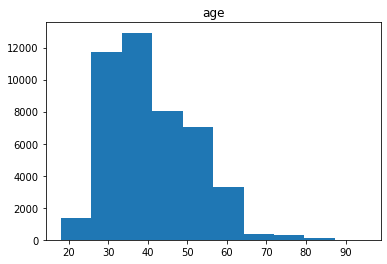

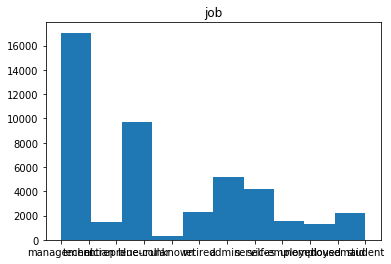

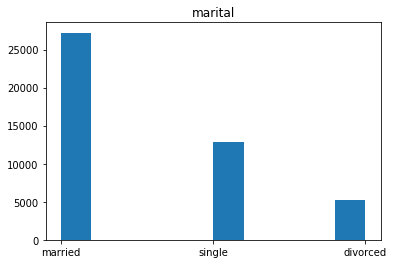

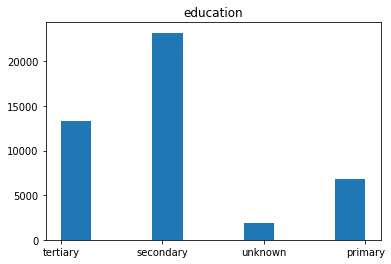

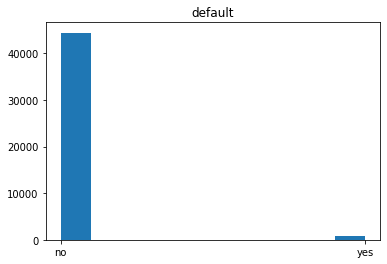

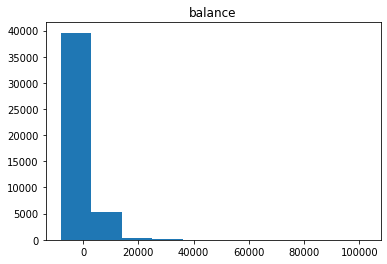

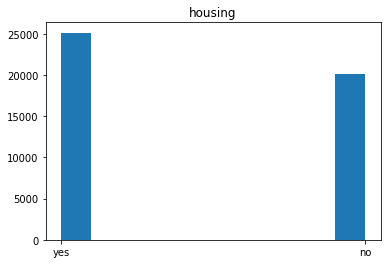

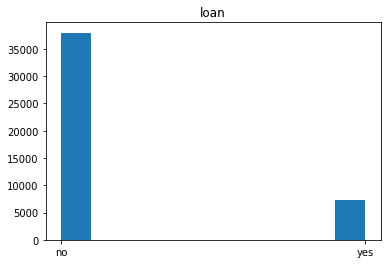

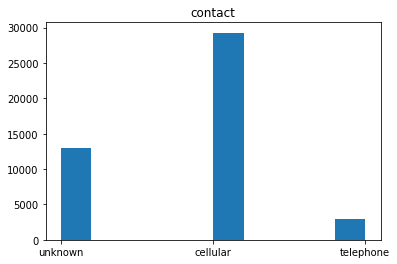

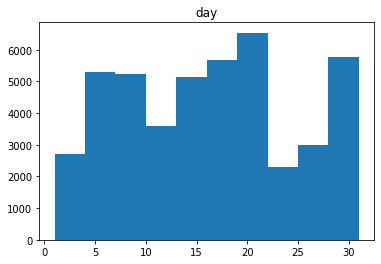

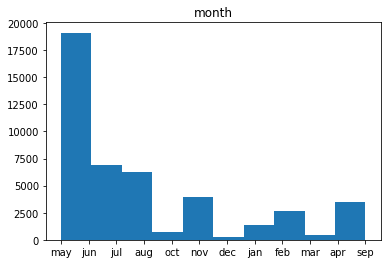

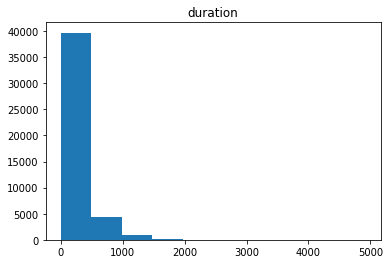

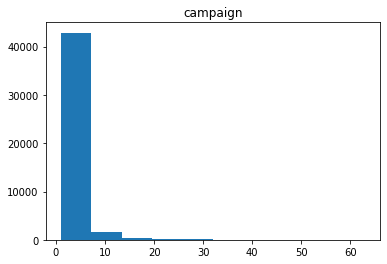

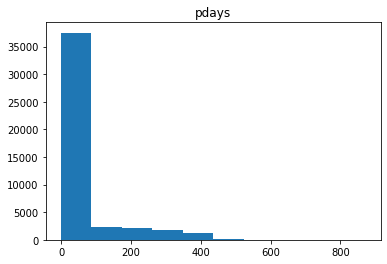

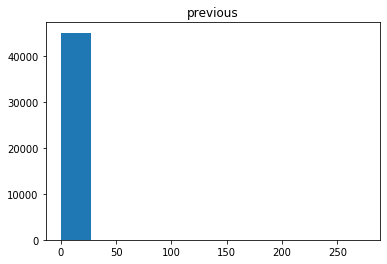

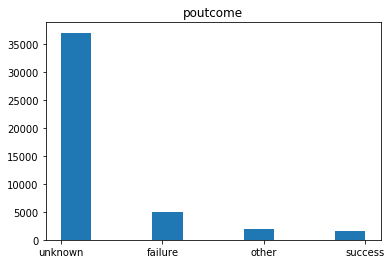

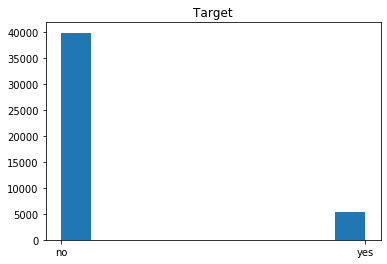

In [18]:
for i in list(pdata.columns):
    plt.hist(pdata[i])
    plt.title(i)
    plt.show()

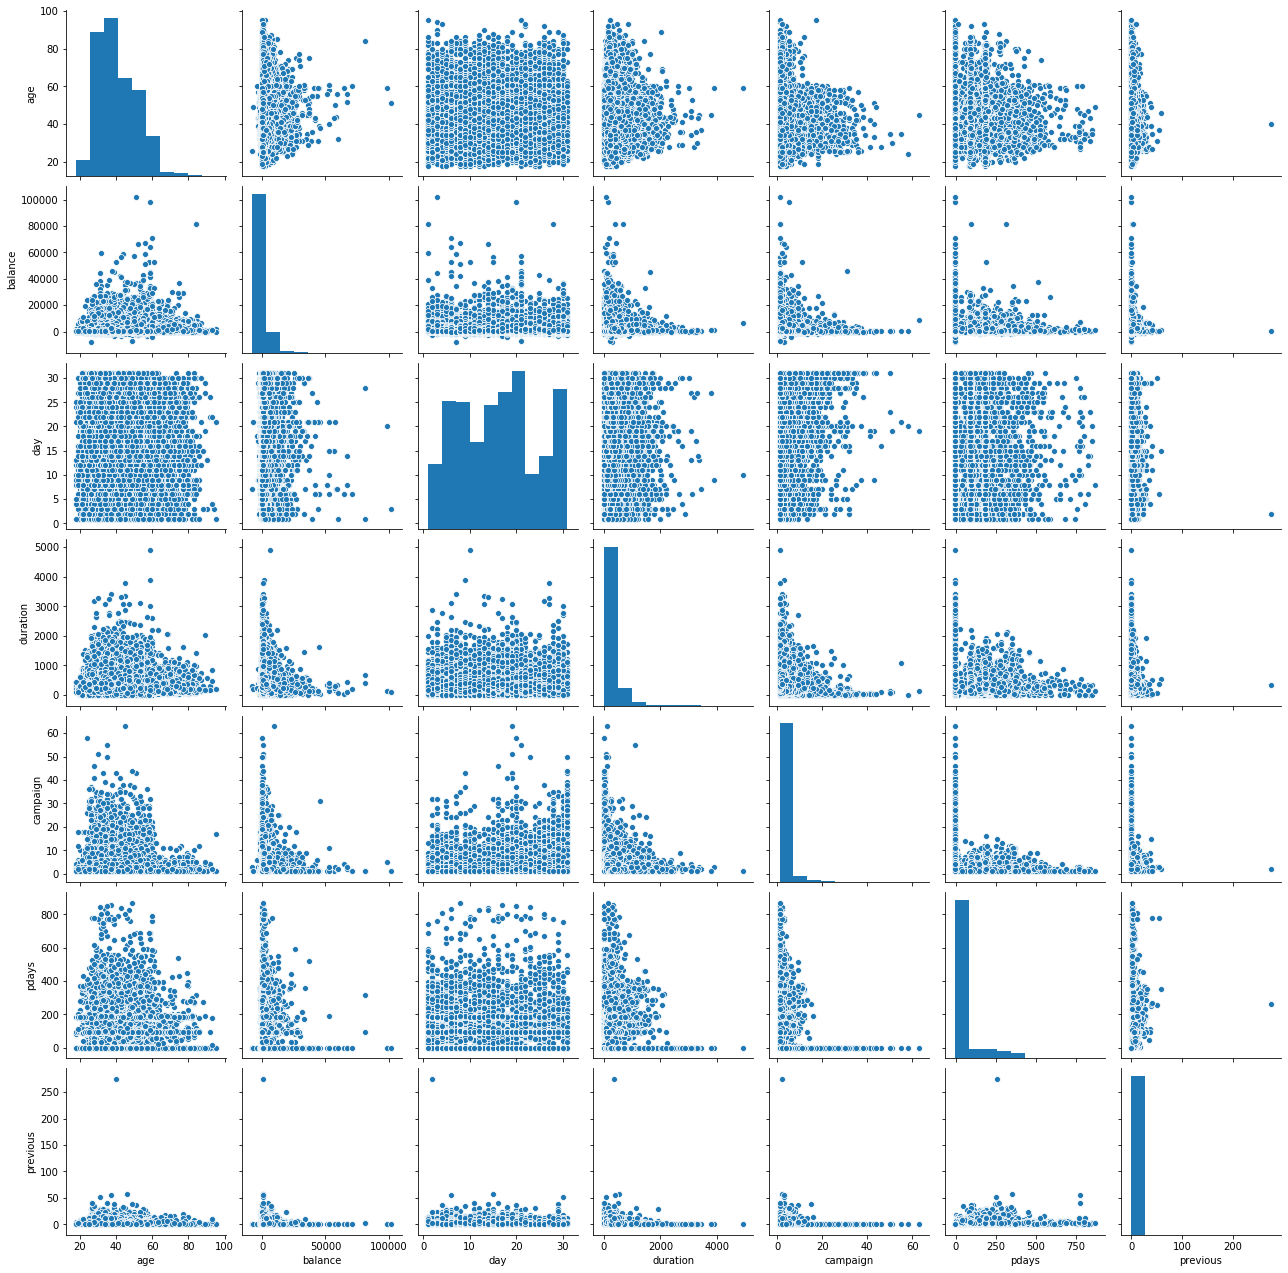

In [19]:
sns.pairplot(pdata)
plt.show()

In [20]:
pdata.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


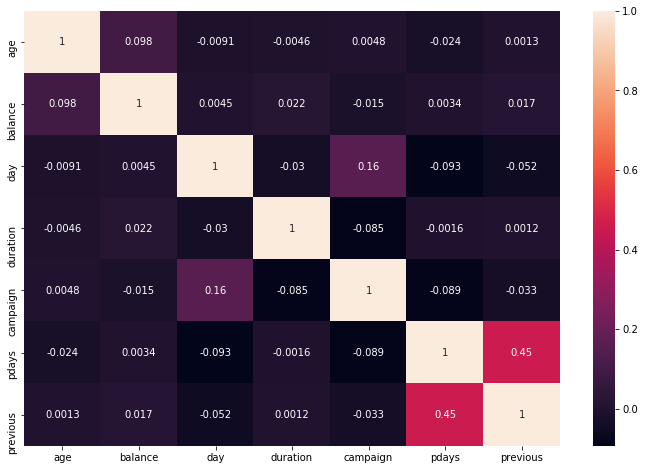

In [21]:
corr = pdata.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

In [22]:
replaceStruct = {
                 "education": {"primary": 1, "secondary":2 , "tertiary": 3,"unknown": -1},
                 "default":   {"no": 1, "yes": 2 },
                 "housing":   {"no": 1, "yes": 2 },
                 "loan":      {"no": 1, "yes": 2 },
                 "month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                 "contact":     {"cellular": 1, "telephone": 2, "unknown": -1 },
                 "poutcome":     {"success": 1, "failure": 2,  "other":3, "unknown":-1},
                 "Target":     {"no": 0, "yes": 1 }
                }
oneHotCols=["job", "marital"]
pdata=pdata.replace(replaceStruct)
pdata=pd.get_dummies(pdata, columns=oneHotCols)
pdata.head(10)

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,1,2143,2,1,-1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,2,1,29,2,1,-1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,2,1,2,2,2,-1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,-1,1,1506,2,1,-1,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,-1,1,1,1,1,-1,5,5,198,...,0,0,0,0,0,0,1,0,0,1
5,35,3,1,231,2,1,-1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,3,1,447,2,2,-1,5,5,217,...,0,0,0,0,0,0,0,0,0,1
7,42,3,2,2,2,1,-1,5,5,380,...,0,0,0,0,0,0,0,1,0,0
8,58,1,1,121,2,1,-1,5,5,50,...,1,0,0,0,0,0,0,0,1,0
9,43,2,1,593,2,1,-1,5,5,55,...,0,0,0,0,1,0,0,0,0,1


In [23]:
#Get data model ready

In [24]:
# Define X and Y variables
X = pdata.drop('Target', axis=1)
Y = pdata[['Target']]

In [25]:
#create a new dataframe for capturing the model metrics for comparison
cf = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# 3. Split the data into training and test set in the ratio of 70:30 respectively

In [26]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

X_train.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
6149,32,2,2,-238,2,1,-1,27,5,427,...,0,0,0,0,0,0,0,0,1,0
12403,34,2,1,-478,2,2,-1,27,6,111,...,0,0,0,0,0,0,0,0,0,1
21645,32,2,1,266,2,1,1,19,8,168,...,0,0,0,0,1,0,0,0,1,0
29580,36,2,2,13,1,2,1,3,2,150,...,0,0,0,0,0,0,0,0,1,0
31245,23,2,1,486,1,1,1,3,3,87,...,0,0,0,1,0,0,0,0,0,1


In [27]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [28]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Target'] == 1]), (len(pdata.loc[pdata['Target'] == 1])/len(pdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Target'] == 0]), (len(pdata.loc[pdata['Target'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 1]), (len(y_train[y_train['Target'] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 0]), (len(y_train[y_train['Target'] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 1]), (len(y_test[y_test['Target'] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 0]), (len(y_test[y_test['Target'] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 5289 (11.70%)
Original Personal Loan False Values   : 39922 (88.30%)

Training Personal Loan True Values    : 3738 (11.81%)
Training Personal Loan False Values   : 27909 (88.19%)

Test Personal Loan True Values        : 1551 (11.43%)
Test Personal Loan False Values       : 12013 (88.57%)



# Build Logistic regression model

In [29]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_predict = logreg.predict(X_test)

In [31]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.8878250703068221

Testing accuracy 0.8886759068121498

Confusion Matrix


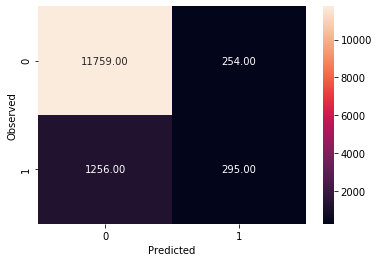

None

Recall: 0.1901998710509349

Precision: 0.5373406193078324

F1 Score: 0.280952380952381

Roc Auc Score: 0.5845280550626356


In [32]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

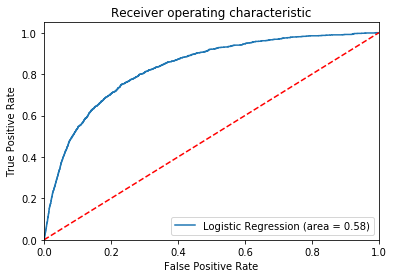

In [33]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
#Since the objective of the model is to identify potential accounts for a campaign that can subscribe to term deposits
#high recall is desired (i.e. err on the side of False Positives)

In [35]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.892, 0.888, 0.892, 0.882, 0.882]

[0.891, 0.889, 0.89, 0.886, 0.885]


In [37]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 1,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.892, 0.882]

[0.891, 0.885]


In [38]:
## Choose L2 and newton-cg

In [39]:
model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg')

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Training accuracy 0.8923120674945493

Testing accuracy 0.8906664700678266


In [40]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.892, 0.893, 0.892, 0.892, 0.892, 0.892]

[0.892, 0.891, 0.891, 0.891, 0.891, 0.891]


Training accuracy 0.809271020949853

Testing accuracy 0.8067679150693011

Confusion Matrix


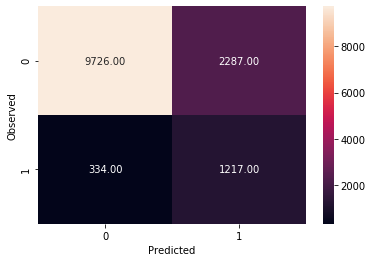

None

Recall: 0.784655061250806

Precision: 0.3473173515981735

F1 Score: 0.48150346191889215

Roc Auc Score: 0.7971389848832904


In [41]:
#improved logistic regression model
model = LogisticRegression(random_state=42, penalty='l2', solver='newton-cg', class_weight='balanced', C=1) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

new_row = {'Model': 'Logistic Regression', 'Accuracy':model.score(X_test, y_test), 'Recall':recall_score(y_test,y_predict), 'Precision' : precision_score(y_test,y_predict), 'F1 Score' :f1_score(y_test,y_predict) }
cf = cf.append(new_row, ignore_index=True)

# Build Decision Tree

In [42]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [43]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8745207903273371


In [44]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8954087275255158
0.8973016809200826


In [45]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.050634
education          0.000000
default            0.000000
balance            0.000000
housing            0.000000
loan               0.000000
contact            0.034668
day                0.000000
month              0.000000
duration           0.589973
campaign           0.000000
pdays              0.096050
previous           0.000000
poutcome           0.228675
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.000000


0.8973016809200826
Recall: 0.31463571889103803

Precision: 0.5965770171149144

F1 Score: 0.4119881806669481


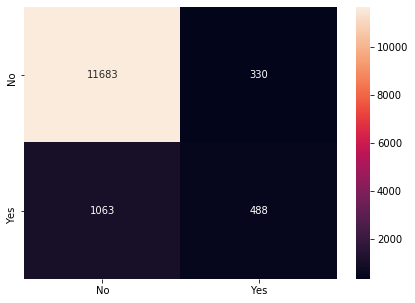

In [46]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

new_row = {'Model': 'Decision Tree', 'Accuracy':dTree.score(X_test, y_test), 'Recall':recall_score(y_test,y_predict), 'Precision' : precision_score(y_test,y_predict), 'F1 Score' :f1_score(y_test,y_predict) }
cf = cf.append(new_row, ignore_index=True)

# Ensemble Models (bagging)

In [47]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9068858743733412
Recall: 0.5003223726627982

Precision: 0.6139240506329114

F1 Score: 0.5513321492007105


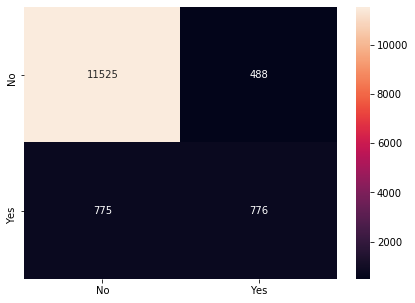

In [48]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [49]:
new_row = {'Model': 'Bagging', 'Accuracy':bgcl.score(X_test , y_test), 'Recall':recall_score(y_test,y_predict), 'Precision' : precision_score(y_test,y_predict), 'F1 Score' :f1_score(y_test,y_predict) }
cf = cf.append(new_row, ignore_index=True)

# Ensemble Learning - Adaboosting

In [50]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8849896785608965
Recall: 0.27852998065764023

Precision: 0.4948453608247423

F1 Score: 0.3564356435643565


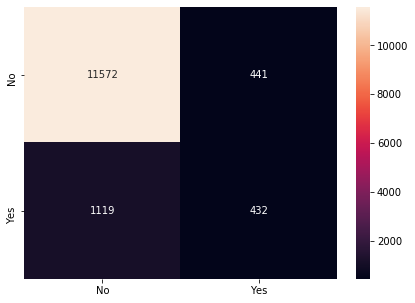

In [51]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [52]:
new_row = {'Model': 'AdaBoosting', 'Accuracy':abcl.score(X_test , y_test), 'Recall':recall_score(y_test,y_predict), 'Precision' : precision_score(y_test,y_predict), 'F1 Score' :f1_score(y_test,y_predict) }
cf = cf.append(new_row, ignore_index=True)

# Ensemble Learning - GradientBoost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.9004718372161604
Recall: 0.32430689877498386

Precision: 0.6248447204968944

F1 Score: 0.4269949066213922


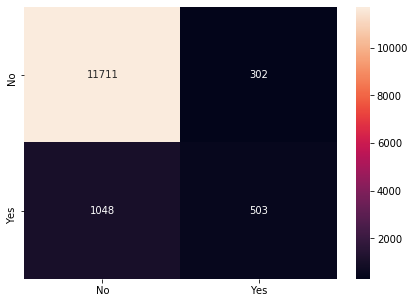

In [54]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [55]:
new_row = {'Model': 'Gradient Boosting', 'Accuracy':gbcl.score(X_test, y_test), 'Recall':recall_score(y_test,y_predict), 'Precision' : precision_score(y_test,y_predict), 'F1 Score' :f1_score(y_test,y_predict) }
cf = cf.append(new_row, ignore_index=True)

# Compare Models

In [56]:
cf.head(5)

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.806768,0.784655,0.347317,0.481503
1,Decision Tree,0.874521,0.314636,0.596577,0.411988
2,Bagging,0.906886,0.500322,0.613924,0.551332
3,AdaBoosting,0.884990,0.278530,0.494845,0.356436
4,Gradient Boosting,0.900472,0.324307,0.624845,0.426995


In [57]:
#Bagging model has the best accuracy, but lower recall
#Logistic regression has lower accuracy, but the best recall out of these models (preferred)